In [ ]:
import sys
!{sys.executable} -m pip install twint
!{sys.executable} -m pip install nest_asyncio
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install networkx

In [50]:
import twint
import nest_asyncio
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

nest_asyncio.apply()

In [2]:
c = twint.Config()
c.Username = 'infoJakarta'
c.Since = "2020-02-01" #batas awal tanggal pengambilan tweet
c.Until = "2021-03-25" #batas akhir tanggal pengambilan tweet
c.Count = True         
c.Retweets = True
c.Stats = True 
c.Show_hashtags = True
c.Hide_output = True
c.Profile_full = True
c.Store_json = True
for key in ['vaksin', 'covid-19', 'sinovac', 'pandemi', 'corona']:
    c.Search = key
    c.Output = './data/infoJakarta.json' # save to json
    twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 13 Tweets from @infoJakarta.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 27 Tweets from @infoJakarta.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 1 Tweets from @infoJakarta.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 10 Tweets from @infoJakarta.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 12 Tweets from @infoJakarta.


In [3]:
df = pd.read_json('./data/infoJakarta.json' , lines = True)
# df
# df = df[['conversation_id', 'id','date','time','tweet','mentions','replies_count','retweets_count','likes_count','hashtags','reply_to','link']]
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1373529155304706054,1373529155304706048,2021-03-21 13:57:24+07:00,2021-03-21,13:57:24,700,106038219,infojakarta,@InfoJakarta,,...,,,,,,[],,,,
1,1372218371442319360,1372218371442319360,2021-03-17 23:08:48+07:00,2021-03-17,23:08:48,700,106038219,infojakarta,@InfoJakarta,,...,,,,,,[],,,,
2,1372150088248664068,1372150088248664064,2021-03-17 18:37:29+07:00,2021-03-17,18:37:29,700,106038219,infojakarta,@InfoJakarta,,...,,,,,,[],,,,
3,1371706352549040133,1371706352549040128,2021-03-16 13:14:14+07:00,2021-03-16,13:14:14,700,106038219,infojakarta,@InfoJakarta,,...,,,,,,[],,,,
4,1366579485793939456,1366579485793939456,2021-03-02 09:41:53+07:00,2021-03-02,09:41:53,700,106038219,infojakarta,@InfoJakarta,,...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1241788956326252545,1241788956326252544,2020-03-23 01:08:53+07:00,2020-03-23,01:08:53,700,106038219,infojakarta,@InfoJakarta,,...,,,,,,[],,,,
122,1241159532178329600,1241159532178329600,2020-03-21 07:27:46+07:00,2020-03-21,07:27:46,700,106038219,infojakarta,@InfoJakarta,,...,,,,,,[],,,,
123,1240298237673623552,1240298237673623552,2020-03-18 22:25:18+07:00,2020-03-18,22:25:18,700,106038219,infojakarta,@InfoJakarta,,...,,,,,,[],,,,
124,1239748592467759104,1239748592467759104,2020-03-17 10:01:12+07:00,2020-03-17,10:01:12,700,106038219,infojakarta,@InfoJakarta,,...,,,,,,[],,,,


In [ ]:
import sys
!{sys.executable} -m pip install selenium

In [4]:
from getpass import getpass
from time import sleep
from selenium.webdriver.common.keys import Keys
# from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
import numpy as np
from datetime import datetime, timedelta

In [5]:
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs",prefs)
# chrome_options.add_argument('headless') # untuk menutup browser

#specify the path to chromedriver.exe
driver = webdriver.Chrome('./chromedriver',chrome_options=chrome_options)

<ipython-input-5-4a1c4cd5d846>:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('./chromedriver',chrome_options=chrome_options)


In [6]:
driver.get('https://www.twitter.com/login')
sleep(2)

username = driver.find_element_by_xpath('//input[@name="session[username_or_email]"]')
username.send_keys('dyingrabbit_') # Ubah username sesuai akun pribadi

my_password = getpass()

password = driver.find_element_by_xpath('//input[@name="session[password]"]')
password.send_keys(my_password)
password.send_keys(Keys.RETURN)

········


In [7]:
data_tweets = df[['tweet','mentions','replies_count','retweets_count','likes_count','hashtags','reply_to','link']]

In [8]:
def get_list_likes(link):
    list_likes = []
    driver.get(link + '/likes')#open link
    sleep(5) #jeda waktu
    
    #scroll to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(2)
    
    try:
        likes_container = driver.find_element_by_xpath('//div[@aria-label="Timeline: Liked by"]') #element dasar likes
        if likes_container: #jika ada maka
            likes = likes_container.find_elements_by_xpath('//div[@dir="ltr"]/span[@class="css-901oao css-16my406 r-poiln3 r-bcqeeo r-qvutc0"]')
            for like in likes:
                list_likes.append(like.text)
    except:
        print(list_likes)
        return list_likes
    print(list_likes)
    return list_likes



def get_list_retweets(link):
    list_retweets = []
    driver.get(link + '/retweets') #open link
    sleep(5)#jeda waktu
    
    #scroll to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(2)
    
    try:
        retweets_container = driver.find_element_by_xpath('//div[@aria-label="Timeline: Retweeted by"]')
        if retweets_container:
            retweets = retweets_container.find_elements_by_xpath('//div[@dir="ltr"]/span[@class="css-901oao css-16my406 r-poiln3 r-bcqeeo r-qvutc0"]')
            for retweet in retweets:
                list_retweets.append(retweet.text)
    except:
        pass
    print(list_retweets)
    return list_retweets

def get_list_replies(link):
    list_replies = []
    driver.get(link)
    sleep(5)
    
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(2)
    
    try:
        replies_container = driver.find_element_by_xpath('//div[@aria-label="Timeline: Conversation"]')
        if replies_container:
            replies = replies_container.find_elements_by_xpath('//div[@dir="ltr"]/span[@class="css-901oao css-16my406 r-poiln3 r-bcqeeo r-qvutc0"]')
            for reply in replies:
                list_replies.append(reply.text)
    except:
        print(list_replies)
        return list_replies
    print(list_replies)
    return list_replies

In [9]:
arr_temp = []
for i, row in data_tweets.iterrows():
     arr_temp.append(get_list_likes(row['link']))   

data_tweets['list_likes'] = arr_temp
data_tweets['list_likes']

['@FitriRamadhian2', '@chiko_jubilee', '@FebriYa84603488', '', '', '', '', '', '', '', '@kompascom', '@kompascom', '', '']
['@Nursanti87', '@sermawati', '@lalilulouie', '@chiko_jubilee', '@fmsyaah', '@audityaaaaa', '@Kumsky', '@suzestful', '@non_Dindun', '@gamakicay', '@iDwfxx232', '', '', '', '', '', '', '', '@kompascom', '@CenayangFilm', '', '', '', '', '']
['@MarwanAdam12', '@dhatamapertiwi', '@RiaWasta', '@Nenglin7', '@chiko_jubilee', '@WongMbambung8', '', '', '', '', '', '', '', '@kompascom', '@CenayangFilm', '', '', '', '', '', '']
['@ValentinoMaiti3', '@sonsofartemis', '', '', '', '', '', '', '', '@kompascom', '@CenayangFilm', '', '', '', '', '', '']
['@JupriSetiawan91', '', '', '', '', '', '', '', '@kompascom', '@CenayangFilm', '', '', '', '', '', '']
['@fandizuma1', '@fdlyamubakhira', '@Sandy20186011', '@inyongcisauk', '@Chandra03866864', '@AliceTahya', '@JoiceYusriani', '@sslatifm', '@dhiba03', '@arinooradnan', '@B54Pei', '@Dun_Vad', '', '', '', '', '', '', '', '@kompascom', 

['@humorgadget', '@Trilusiana7', '@UbaidAbdullah17', '@rmuhamadguntur1', '@xaquilaaaa', '@rafibecek_', '@Tatsuya_08_09', '@nalobong20', '@idaafarh', '@AndiYuwanto', '@jamupathok', '@RonaldSiagian9', '@The_Darth_Maul_', '@mal_malla02', '@kmjodohku', '', '', '', '', '', '', '', '@TirtoID', '@worksfess', '@kompascom', '', '', '', '', '']
['@hendriwspro', '@alktito', '@AshterLudfi', '@mulyadi108', '@Rafaelnasution2', '@proficiatt', '@andispta', '@Syturtles', '@qoriatulH', '@deliari25', '@Sulisti07721050', '@Bjl242', '@hollysativa', '@erwinaryadh', '@UbaidAbdullah17', '@NDestiari', '@DavidHarun5', '@deniezmays', '@tetebantet', '@euphoriman', '@ridwanology_', '@andhkaep', '@DaniDaniChan18', '@ABesf99', '', '', '', '', '', '', '', '@TirtoID', '@worksfess', '@kompascom', '', '', '', '', '']
['@Zinzo76368241', '@Lidia95192767', '@intanabill', '@NandaTeguh14', '@topleskongguan', '@haryatiwid', '@lasihnovita', '@yunhariadi', '@agussword4', '@muhnurtegar', '@aslamisme_', '@Joker47As', '@adipnl14',

['@keudeukupi', '@reptilerrr', '@Susanti94635927', '@l3na_l3na', '@ImHanakbangsa', '@feierey', '@The_Darth_Maul_', '@Juniorternama', '@RhaenysTargryn', '@Ggone_tak', '@imwandering__', '@beth_albichar', '@lady1426', '', '', '', '', '', '', '', '', '@NBA', '@worksfess', '@sbyfess', '@sbyfess', '', '', '', '']
['@taufiikhd_', '@Putra90907091', '@renee_sheva', '@The_Darth_Maul_', '@mAzPurrr', '@Juniorternama', '@RhaenysTargryn', '@Ggone_tak', '@lady1426', '', '', '', '', '', '', '', '', '@NBA', '@worksfess', '@sbyfess', '@sbyfess', '', '', '', '']
['@Bagasadiluhung_', '@Izzatjauharii', '@utaria911', '@virgoromeo46', '@LanniKooks', '@stephanie_milan', '@RistyaAnanda', '@HerlinaHotmauly', '@moooootia', '@kmjnn04', '@DahLia00599520', '@Hamdiees', '@namakuuri', '@KeyRa_Chan', '@pairoffish', '@ucioktiya01', '@UpnDown__', '@lemet_riyadi', '@Naufalseptian15', '@gembiraputra', '@Pr1nC3j03', '@ceuecans_', '@mkamalazizi', '@vintenas', '@khairuumah21', '', '', '', '', '', '', '', '', '@NBA', '@worksf

['@NOhoirenan', '@Roy66580479', '@Minion89820752', '@abokenward2', '@miiizzzs', '@R__Gede', '@FransiskaDA', '@fridaarchuleta', '@ranigltm', '@zicoervielde', '@iezha18', '@irmanadha', '@1090syo', '@doubleorn0thing', '@ddychristian', '@KokoPiero', '@maatudechan_', '@ChieneLs', '@sonsofartemis', '@rickyywhy', '@131Lfa', '@Adeliasftrii1', '@kuinibuchen', '@sanggelombang', '', '', '', '', '', '', '', '', '@kompascom', '@kompascom', '', '', '', '']
['@louiuli', '@BayuHendry4', '@muliadi40439023', '@inyongcisauk', '@sambateverytim', '@DiahSiwa', '@marianekuswari', '@nh_wijaya', '@RiusSimanungka3', '@triomarleyano', '@tambunan10', '@_babehnino', '@andikoarya', '@AprianyLina', '@Rifkimuhammadd', '@itsyounqman', '@yudamuniran', '@AudinaSaleh', '@abilismail', '@Urmineee_1', '@riyankopite', '@starks_real', '@decvtared', '@ditanovsa', '@Daseyt2', '', '', '', '', '', '', '', '', '', '@kompascom', '@kompascom', '', '', '', '']
['@SugiantoJahja', '@ikhacute21', '@ainunrizza', '@DHandarbeni', '@Arnespw

['@cariaesendiri', '@akew42182960', '@ichsanrin', '@virzahafni93', '@miskumisku', '@Isnaini081199', '@bejoarief6', '@mynicknamesha', '@frhnabl_', '@MHeripamanshiva', '@zanmottamanih', '@KaumTidor', '@basicallybabble', '@UbaidAbdullah17', '@isallollee', '', '', '', '', '', '', '', '@sbyfess', '@worksfess', '@sbyfess', '@liboorans', '', '', '', '']
['@suciilliinn', '@AmaliaRahman8', '@Selfrem28290344', '@andryabsb', '@hedithp', '@lvnvania', '@MarianiSekedang', '@cloudinfo3', '@duchessofr', '@nirvabula', '@iprefermarigold', '@VLong59582105', '@wilyun_hamim10', '@hhrdnt', '@ardliann', '@sugisugali', '@teh_manis', '@Red_Zyone', '@thaethaaa', '@anaksusu', '@donyafrizal', '@sape_ajee', '@ndesta', '@zlfkri17', '@spiontanduk', '', '', '', '', '', '', '', '@sbyfess', '@worksfess', '@sbyfess', '@liboorans', '', '', '', '']
['@keudeukupi', '@reptilerrr', '@Susanti94635927', '@l3na_l3na', '@ImHanakbangsa', '@feierey', '@The_Darth_Maul_', '@Juniorternama', '@RhaenysTargryn', '@Ggone_tak', '@imwander

<ipython-input-9-bb503792d336>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets['list_likes'] = arr_temp


0      [@FitriRamadhian2, @chiko_jubilee, @FebriYa846...
1      [@Nursanti87, @sermawati, @lalilulouie, @chiko...
2      [@MarwanAdam12, @dhatamapertiwi, @RiaWasta, @N...
3      [@ValentinoMaiti3, @sonsofartemis, , , , , , ,...
4      [@JupriSetiawan91, , , , , , , , @kompascom, @...
                             ...                        
121    [@Bagasadiluhung_, @Izzatjauharii, @utaria911,...
122    [@bpmspanas, @IkhsanAminulah, @lilisuma5, @ham...
123    [@Yanto22180914, @deaaja09265787, @sri_yanyan,...
124    [@herysg012, @rmipangloli, @aku_kristian, @dea...
125    [@deaaja09265787, @Zahra1607, @JoniKurnia4, @N...
Name: list_likes, Length: 126, dtype: object

In [10]:
arr_temp = []
for i, row in data_tweets.iterrows():
     arr_temp.append(get_list_retweets(row['link']))

data_tweets['list_retweets'] = arr_temp
data_tweets['list_retweets']

['@akoemala', '@nutanews184', '@liranti', '', '', '', '', '', '', '', '', '', '@DailyHomePics', '@karirfess', '@karirfess', '@kompascom', '', '', '', '']
['@Desta412', '@Hamdiees', '@wenntyputri', '@chiko_jubilee', '@maharetweet', '@nutanews184', '@vonnysu', '@Chocomilksugar', '@non_Dindun', '', '', '', '', '', '', '', '', '', '@DailyHomePics', '@karirfess', '@karirfess', '@kompascom', '', '', '', '']
['@Hamdiees', '@gilangandriani', '@chiko_jubilee', '', '', '', '', '', '', '', '', '', '@DailyHomePics', '@karirfess', '@karirfess', '@kompascom', '', '', '', '']
[]
['@faqihiqaf', '', '', '', '', '', '', '', '', '@kompascom', '@bwifess', '@kompascom', '', '', '']
['@fitrywhys', '@Jojonanajam', '@suleman_ahmda', '@wulanramdhoni', '', '', '', '', '', '', '', '', '@kompascom', '@bwifess', '@DailyHomePics', '', '', '', '']
[]
['@Lotus_Pandas', '@cahayasastra', '@bougieslight', '@jeni_prabandari', '@listia_home', '@onaplanet00', '@Maximodeus', '@dhantiti', '@rizaky_syifa', '@nu_kinneas', '@co

['@reallldask', '@risqanrca', '@Mini_anggraeni9', '@asnggebu', '@agungekaputraa', '@priayudi____', '', '', '', '', '', '', '', '', '', '@karirfess', '@codingfess', '@eventsurabaya', '@sbyfess', '', '', '', '', '']
['@zksiq', '@yud_iii', '@tghtry', '@mypokah', '@JokerKhayalan', '@MukhlisSaptono', '@rayenisme', '', '', '', '', '', '', '', '', '', '@tubirfess', '@bwifess', '@codingfess', '@sstsetya', '@sstsetya', '', '', '', '']
['@yhaaribet', '@Gawick', '@belladom7', '@bunnyearswith', '@chindesrella', '@wndynabila', '@EngineerKucluK', '@Jk_mytimeee', '', '', '', '', '', '', '', '', '', '@tubirfess', '@bwifess', '@codingfess', '@sstsetya', '@sstsetya', '', '', '', '', '']
['@sam_joko', '', '', '', '', '', '', '', '', '', '@tubirfess', '@bwifess', '@codingfess', '@sstsetya', '@sstsetya', '', '', '', '']
[]
['@nasep6691', '@Mitalarasati10', '@HelloQetty__', '@meydap77', '@snowkahontas', '@ArdhFil', '@smkdipo_1', '@derryl_liem', '@dimasnamanya', '@titisfdllh', '@anjanisihombing', '@adamsongz

['@NandoMahubessy', '@ardiyantosusilo', '@bellaazhr', '@yodhani', '@AnnaTham7', '@annishanh', '', '', '', '', '', '', '@kompascom', '@kompascom', '', '', '', '', '', '', '']
['@hafshahsirin', '@marianekuswari', '@triomarleyano', '@priyankhana', '@meipakz31', '@cacashasya', '@ndalillah24', '@zidanariqzidan', '@changeyournamee', '@reinaldey', '@MMarwanmanurung', '@Alchakim', '@muhamadaziim', '@starks_real', '@gitaindrianaaa', '@tyo78766711', '@YussufiDyas', '@febrina_02', '@ariaraywidodo', '', '', '', '', '', '', '@kompascom', '@kompascom', '', '', '', '', '', '', '']
['@Dolly95188742', '@Fulan98524591', '', '', '', '', '', '', '@kompascom', '@kompascom', '', '', '', '', '', '']
['@otozczyski', '@mughnigofur7', '@shalofficial_', '@z_junii', '', '', '', '', '', '', '@kompascom', '@kompascom', '', '', '', '', '', '']
['@pitiiw', '@pandubidubidam', '@Zidanefahmi3', '@ampanagara', '@yunaaakty', '@Kewl_Wyfee', '@zaitampan', '@hafidhroon', '@hakimazizz', '@ledoarejl', '@grdy46', '@abangical10'

['@nnandarii', '@ikhacute21', '@ok1sianipar', '@DHandarbeni', '@jempolkajepit', '@sharonsireeta', '@lahhrijal', '@adiantanu', '@NorHafizhah', '@icanARM', '', '', '', '', '', '', '', '', '', '', '@worksfess', '@kompascom', '@karirfess', '@karirfess', '', '', '', '', '', '', '']
['@FRRESWARI', '@DaliaDamania', '@_Jiaaa12', '@randyadi31', '@pnddwntr', '@akaibipamare', '@RetnoFitrianii', '@damiandytto', '@Anthonysays_', '@LPSRB_', '@Desperatama', '@faujanisn', '@Khariestama', '@hazdjoeki', '@titiuuw', '@madyanti_putri', '@chiqui_a', '@Abdulaj12664283', '@HannaKartika', '@FSchwarzeneger', '@HrtThtaIntnPrmt', '@panggilkepuluu', '@itztoofunny', '', '', '', '', '', '', '', '', '', '', '', '@worksfess', '@kompascom', '@karirfess', '', '', '', '', '', '', '']
['@yuura4', '@tartaskm', '@aruvisan', '@krishnayana95', '@zanmottamanih', '@awayawa_', '@rayenisme', '@darwinthefishhh', '@Yailahmo', '@thealteroftar', '@bastionn', '@Aryuching12', '', '', '', '', '', '', '', '', '', '', '', '@worksfess', '

<ipython-input-10-f5099a83a56e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets['list_retweets'] = arr_temp


0      [@akoemala, @nutanews184, @liranti, , , , , , ...
1      [@Desta412, @Hamdiees, @wenntyputri, @chiko_ju...
2      [@Hamdiees, @gilangandriani, @chiko_jubilee, ,...
3                                                     []
4      [@faqihiqaf, , , , , , , , , @kompascom, @bwif...
                             ...                        
121    [@Rafaaaaaan, @moooootia, @muhr1dwan, @DahLia0...
122    [@ropoo_, @hamzah1503, @ProletarisaL, @littdre...
123                                                   []
124    [@nRobi_, @kitnaceda, @olindiana, @aryoajinugr...
125    [@DonyPrasetyo24, @taufiqrohim7, @lizayulianii...
Name: list_retweets, Length: 126, dtype: object

In [11]:
arr_temp = []
for i, row in data_tweets.iterrows():
     arr_temp.append(get_list_replies(row['link']))

data_tweets['list_replies'] = arr_temp
data_tweets['list_replies']

['@infojakarta', '@DKIJakarta', '@chiko_jubilee']
['@infojakarta']
['@infojakarta']
['@infojakarta', '@detikcom']
['@infojakarta', '@sandiuno']
['@infojakarta', '@PutraWilson']
['@infojakarta']
['@infojakarta', '@riskawindayln', '@1nstantkarm4', '@adhepedrosa', '@ImmanuelOwen', '@danlaksana', '@Malala181321', '@NinoRahadian', '@NinoRahadian', '@misbah_dadan', '@ejp_joker', '@yasmnfs', '@romadalimunthe', '@MuhammadLukman_', '@ketekniall', '@JAmsterdam7', '@NovalSyawal', '@bangopang_', '@abdulmuisme', '@misseca__', '@adityawijaya', '@rakaadtya21', '@cillresdy', '@ajfrm_', '@seokaim', '@chernobyl_9', '@aldinohendrwn', '@Wicaksono_sini', '@panikpanikk', '@Rizky_Gendon']
['@infojakarta', '@infojakarta', '@Rizky_Gendon', '@yusamhr', '@lyfes_hit', '@sikanseu']
['@infojakarta', '@Maxgirl13', '@Agus1892', '@megane_brai', '@WibowoLukito', '@RemajaKolonial', '@Arie_16', '@herry28290', '@MisterClown8', '@cillresdy', '@Arie_16', '@teyeng37', '@babyoil008', '@christofer_bhp', '@rinihaphap', '@okkyjo

['@infojakarta', '@infojakarta', '@infojakarta', '@infojakarta', '@infojakarta']
['@infojakarta', '@infojakarta', '@infojakarta', '@infojakarta', '@infojakarta', '@sehatdinati']
['@infojakarta', '@The_Darth_Maul_']
['@infojakarta', '@NurHasa52632749', '@willjonz', '@ursadboys']
['@infojakarta', '@naninanura', '@youngkindaeyo', '@radiansyahadjh', '@rantaianjing', '@kanzay', '@dianatahart', '@anakbawangputi', '@Jelekzafran', '@Yosedepok', '@u07n04a98']
['@infojakarta', '@yudh1t', '@rabkalinad', '@Bencok_Emak', '@BimaFatkhurrif1']
['@infojakarta', '@DORKyungsoo4']
['@infojakarta', '@DKIJakarta', '@chiko_jubilee']
['@infojakarta']
['@infojakarta']
['@infojakarta', '@detikcom']
['@infojakarta', '@sandiuno']
['@infojakarta', '@PutraWilson']
['@infojakarta']
['@infojakarta', '@riskawindayln', '@1nstantkarm4', '@adhepedrosa', '@ImmanuelOwen', '@danlaksana', '@Malala181321', '@NinoRahadian', '@NinoRahadian', '@misbah_dadan', '@ejp_joker', '@yasmnfs', '@romadalimunthe', '@MuhammadLukman_', '@ket

['@infojakarta', '@megane_brai', '@Riyo109', '@Septiaraenii', '@RachmaSakinah', '@iqbalfarisy', '@eru_joo_han', '@e_gabagus', '@PETERBOLOHO', '@pais_hileud', '@InsurgentArmy33', '@jenengkuroi', '@rakaadtya21', '@naana1704', '@Syaiful12258759']
['@infojakarta', '@nanyadoank123', '@petabencana', '@nuniekrr', '@eskopidrip', '@sans__boy', '@KJantan2', '@Rifai80099970', '@david_X89', '@KlopPep', '@Tatsuya_08_09']
['@infojakarta', '@kiwcor3', '@PHANIEakaPAAK', '@zanmottamanih', '@soens18', '@malikinnas', '@ndetitik', '@crisetia']
['@infojakarta', '@balqistEI24', '@escobaryn', '@SasaEdrian', '@crispyme91', '@Lily14102', '@PHANIEakaPAAK', '@heysimeee10', '@Ditya_mamo88', '@amruran', '@wulan_sr5', '@ghnrznnn', '@Daffaprytn']
['@infojakarta', '@infojakarta', '@infojakarta', '@infojakarta', '@infojakarta']
['@infojakarta', '@infojakarta', '@infojakarta', '@infojakarta', '@infojakarta', '@sehatdinati']
['@infojakarta', '@The_Darth_Maul_']
['@infojakarta', '@NurHasa52632749', '@willjonz', '@ursadbo

<ipython-input-11-d983d59b64d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets['list_replies'] = arr_temp


0            [@infojakarta, @DKIJakarta, @chiko_jubilee]
1                                         [@infojakarta]
2                                         [@infojakarta]
3                              [@infojakarta, @detikcom]
4                              [@infojakarta, @sandiuno]
                             ...                        
121                     [@infojakarta, @The_Darth_Maul_]
122    [@infojakarta, @NurHasa52632749, @willjonz, @u...
123    [@infojakarta, @naninanura, @youngkindaeyo, @r...
124    [@infojakarta, @yudh1t, @rabkalinad, @Bencok_E...
125                        [@infojakarta, @DORKyungsoo4]
Name: list_replies, Length: 126, dtype: object

In [33]:
 data_tweets.to_json('data/Scraping.json')

In [ ]:
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

In [104]:
twt_df = pd.read_json('data/Scraping.json')
twt_df.head()

,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,link,list_likes,list_retweets,list_replies
0,Kalau tidak salah baca datanya. Kemarin 20 ma...,"[{'screen_name': 'dkijakarta', 'name': 'pempro...",2,4,5,[],[],https://twitter.com/infojakarta/status/1373529...,"[@FitriRamadhian2, @chiko_jubilee, @FebriYa846...","[@akoemala, @nutanews184, @liranti, , , , , , ...","[@infojakarta, @DKIJakarta, @chiko_jubilee]"
1,Vaksin lansia di @UnikaAtmaJaya Terbuka untuk...,"[{'screen_name': 'unikaatmajaya', 'name': 'uni...",0,12,13,[],[],https://twitter.com/infojakarta/status/1372218...,"[@Nursanti87, @sermawati, @lalilulouie, @chiko...","[@Desta412, @Hamdiees, @wenntyputri, @chiko_ju...",[@infojakarta]
2,Lansia dengan ktp daerah manapun bisa mendapat...,[],0,5,8,[],[],https://twitter.com/infojakarta/status/1372150...,"[@MarwanAdam12, @dhatamapertiwi, @RiaWasta, @N...","[@Hamdiees, @gilangandriani, @chiko_jubilee, ,...",[@infojakarta]
3,"Pelaku industri pariwisata di Jakarta, apakah ...",[],0,0,3,[],[],https://twitter.com/infojakarta/status/1371706...,"[@ValentinoMaiti3, @sonsofartemis, , , , , , ,...",[],"[@infojakarta, @detikcom]"
4,"Bergerak pararel. Vaksin jalan, pariwisata be...","[{'screen_name': 'sandiuno', 'name': 'sandiaga...",0,1,2,[],[],https://twitter.com/infojakarta/status/1366579...,"[@JupriSetiawan91, , , , , , , , @kompascom, @...","[@faqihiqaf, , , , , , , , , @kompascom, @bwif...","[@infojakarta, @sandiuno]"


In [105]:
arr_tmp = []
for i,row in twt_df.iterrows():
    liker = row['list_likes']
    idx = -1
    for like in liker:
        idx+=1
        if(like==''):
            break
    arr_tmp.append(liker[:idx])
    
arr_tmp
twt_df['list_likes'] = arr_tmp
twt_df

,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,link,list_likes,list_retweets,list_replies
0,Kalau tidak salah baca datanya. Kemarin 20 ma...,"[{'screen_name': 'dkijakarta', 'name': 'pempro...",2,4,5,[],[],https://twitter.com/infojakarta/status/1373529...,"[@FitriRamadhian2, @chiko_jubilee, @FebriYa846...","[@akoemala, @nutanews184, @liranti, , , , , , ...","[@infojakarta, @DKIJakarta, @chiko_jubilee]"
1,Vaksin lansia di @UnikaAtmaJaya Terbuka untuk...,"[{'screen_name': 'unikaatmajaya', 'name': 'uni...",0,12,13,[],[],https://twitter.com/infojakarta/status/1372218...,"[@Nursanti87, @sermawati, @lalilulouie, @chiko...","[@Desta412, @Hamdiees, @wenntyputri, @chiko_ju...",[@infojakarta]
2,Lansia dengan ktp daerah manapun bisa mendapat...,[],0,5,8,[],[],https://twitter.com/infojakarta/status/1372150...,"[@MarwanAdam12, @dhatamapertiwi, @RiaWasta, @N...","[@Hamdiees, @gilangandriani, @chiko_jubilee, ,...",[@infojakarta]
3,"Pelaku industri pariwisata di Jakarta, apakah ...",[],0,0,3,[],[],https://twitter.com/infojakarta/status/1371706...,"[@ValentinoMaiti3, @sonsofartemis]",[],"[@infojakarta, @detikcom]"
4,"Bergerak pararel. Vaksin jalan, pariwisata be...","[{'screen_name': 'sandiuno', 'name': 'sandiaga...",0,1,2,[],[],https://twitter.com/infojakarta/status/1366579...,[@JupriSetiawan91],"[@faqihiqaf, , , , , , , , , @kompascom, @bwif...","[@infojakarta, @sandiuno]"
...,...,...,...,...,...,...,...,...,...,...,...
121,Fasilitas test corona terbaru dari Korea selat...,[],1,78,126,[coronaviruspandemic],[],https://twitter.com/infojakarta/status/1241788...,"[@Bagasadiluhung_, @Izzatjauharii, @utaria911,...","[@Rafaaaaaan, @moooootia, @muhr1dwan, @DahLia0...","[@infojakarta, @The_Darth_Maul_]"
122,"Ayo, saling bantu, gerak bersama tanggulangi c...",[],4,47,52,[],[],https://twitter.com/infojakarta/status/1241159...,"[@bpmspanas, @IkhsanAminulah, @lilisuma5, @ham...","[@ropoo_, @hamzah1503, @ProletarisaL, @littdre...","[@infojakarta, @NurHasa52632749, @willjonz, @u..."
123,Bagaimana dampak pandemi corona ke usaha atau ...,[],10,0,8,[coronaindonesia],[],https://twitter.com/infojakarta/status/1240298...,"[@Yanto22180914, @deaaja09265787, @sri_yanyan,...",[],"[@infojakarta, @naninanura, @youngkindaeyo, @r..."
124,Virus Corona tidak akan pilih pendukung siapa ...,[],6,36,36,[],[],https://twitter.com/infojakarta/status/1239748...,"[@herysg012, @rmipangloli, @aku_kristian, @dea...","[@nRobi_, @kitnaceda, @olindiana, @aryoajinugr...","[@infojakarta, @yudh1t, @rabkalinad, @Bencok_E..."


In [106]:
arr_tmp = []
for i,row in twt_df.iterrows():
    rts = row['list_retweets']
    idx = -1
    for rt in rts:
        idx+=1
        if(rt==''):
            break
    arr_tmp.append(rts[:idx])
    
arr_tmp
twt_df['list_retweets'] = arr_tmp
twt_df

,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,link,list_likes,list_retweets,list_replies
0,Kalau tidak salah baca datanya. Kemarin 20 ma...,"[{'screen_name': 'dkijakarta', 'name': 'pempro...",2,4,5,[],[],https://twitter.com/infojakarta/status/1373529...,"[@FitriRamadhian2, @chiko_jubilee, @FebriYa846...","[@akoemala, @nutanews184, @liranti]","[@infojakarta, @DKIJakarta, @chiko_jubilee]"
1,Vaksin lansia di @UnikaAtmaJaya Terbuka untuk...,"[{'screen_name': 'unikaatmajaya', 'name': 'uni...",0,12,13,[],[],https://twitter.com/infojakarta/status/1372218...,"[@Nursanti87, @sermawati, @lalilulouie, @chiko...","[@Desta412, @Hamdiees, @wenntyputri, @chiko_ju...",[@infojakarta]
2,Lansia dengan ktp daerah manapun bisa mendapat...,[],0,5,8,[],[],https://twitter.com/infojakarta/status/1372150...,"[@MarwanAdam12, @dhatamapertiwi, @RiaWasta, @N...","[@Hamdiees, @gilangandriani, @chiko_jubilee]",[@infojakarta]
3,"Pelaku industri pariwisata di Jakarta, apakah ...",[],0,0,3,[],[],https://twitter.com/infojakarta/status/1371706...,"[@ValentinoMaiti3, @sonsofartemis]",[],"[@infojakarta, @detikcom]"
4,"Bergerak pararel. Vaksin jalan, pariwisata be...","[{'screen_name': 'sandiuno', 'name': 'sandiaga...",0,1,2,[],[],https://twitter.com/infojakarta/status/1366579...,[@JupriSetiawan91],[@faqihiqaf],"[@infojakarta, @sandiuno]"
...,...,...,...,...,...,...,...,...,...,...,...
121,Fasilitas test corona terbaru dari Korea selat...,[],1,78,126,[coronaviruspandemic],[],https://twitter.com/infojakarta/status/1241788...,"[@Bagasadiluhung_, @Izzatjauharii, @utaria911,...","[@Rafaaaaaan, @moooootia, @muhr1dwan, @DahLia0...","[@infojakarta, @The_Darth_Maul_]"
122,"Ayo, saling bantu, gerak bersama tanggulangi c...",[],4,47,52,[],[],https://twitter.com/infojakarta/status/1241159...,"[@bpmspanas, @IkhsanAminulah, @lilisuma5, @ham...","[@ropoo_, @hamzah1503, @ProletarisaL, @littdre...","[@infojakarta, @NurHasa52632749, @willjonz, @u..."
123,Bagaimana dampak pandemi corona ke usaha atau ...,[],10,0,8,[coronaindonesia],[],https://twitter.com/infojakarta/status/1240298...,"[@Yanto22180914, @deaaja09265787, @sri_yanyan,...",[],"[@infojakarta, @naninanura, @youngkindaeyo, @r..."
124,Virus Corona tidak akan pilih pendukung siapa ...,[],6,36,36,[],[],https://twitter.com/infojakarta/status/1239748...,"[@herysg012, @rmipangloli, @aku_kristian, @dea...","[@nRobi_, @kitnaceda, @olindiana, @aryoajinugr...","[@infojakarta, @yudh1t, @rabkalinad, @Bencok_E..."


In [108]:
arr_tmp = []
for i,row in twt_df.iterrows():
    reps = row['list_replies']
    if '@infojakarta' in reps:
        reps.remove('@infojakarta')
    arr_tmp.append(reps)
    
twt_df['list_replies'] = arr_tmp
twt_df

,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,link,list_likes,list_retweets,list_replies
0,Kalau tidak salah baca datanya. Kemarin 20 ma...,"[{'screen_name': 'dkijakarta', 'name': 'pempro...",2,4,5,[],[],https://twitter.com/infojakarta/status/1373529...,"[@FitriRamadhian2, @chiko_jubilee, @FebriYa846...","[@akoemala, @nutanews184, @liranti]","[@DKIJakarta, @chiko_jubilee]"
1,Vaksin lansia di @UnikaAtmaJaya Terbuka untuk...,"[{'screen_name': 'unikaatmajaya', 'name': 'uni...",0,12,13,[],[],https://twitter.com/infojakarta/status/1372218...,"[@Nursanti87, @sermawati, @lalilulouie, @chiko...","[@Desta412, @Hamdiees, @wenntyputri, @chiko_ju...",[]
2,Lansia dengan ktp daerah manapun bisa mendapat...,[],0,5,8,[],[],https://twitter.com/infojakarta/status/1372150...,"[@MarwanAdam12, @dhatamapertiwi, @RiaWasta, @N...","[@Hamdiees, @gilangandriani, @chiko_jubilee]",[]
3,"Pelaku industri pariwisata di Jakarta, apakah ...",[],0,0,3,[],[],https://twitter.com/infojakarta/status/1371706...,"[@ValentinoMaiti3, @sonsofartemis]",[],[@detikcom]
4,"Bergerak pararel. Vaksin jalan, pariwisata be...","[{'screen_name': 'sandiuno', 'name': 'sandiaga...",0,1,2,[],[],https://twitter.com/infojakarta/status/1366579...,[@JupriSetiawan91],[@faqihiqaf],[@sandiuno]
...,...,...,...,...,...,...,...,...,...,...,...
121,Fasilitas test corona terbaru dari Korea selat...,[],1,78,126,[coronaviruspandemic],[],https://twitter.com/infojakarta/status/1241788...,"[@Bagasadiluhung_, @Izzatjauharii, @utaria911,...","[@Rafaaaaaan, @moooootia, @muhr1dwan, @DahLia0...",[@The_Darth_Maul_]
122,"Ayo, saling bantu, gerak bersama tanggulangi c...",[],4,47,52,[],[],https://twitter.com/infojakarta/status/1241159...,"[@bpmspanas, @IkhsanAminulah, @lilisuma5, @ham...","[@ropoo_, @hamzah1503, @ProletarisaL, @littdre...","[@NurHasa52632749, @willjonz, @ursadboys]"
123,Bagaimana dampak pandemi corona ke usaha atau ...,[],10,0,8,[coronaindonesia],[],https://twitter.com/infojakarta/status/1240298...,"[@Yanto22180914, @deaaja09265787, @sri_yanyan,...",[],"[@naninanura, @youngkindaeyo, @radiansyahadjh,..."
124,Virus Corona tidak akan pilih pendukung siapa ...,[],6,36,36,[],[],https://twitter.com/infojakarta/status/1239748...,"[@herysg012, @rmipangloli, @aku_kristian, @dea...","[@nRobi_, @kitnaceda, @olindiana, @aryoajinugr...","[@yudh1t, @rabkalinad, @Bencok_Emak, @BimaFatk..."


In [109]:
 twt_df.to_json('data/Scraping-clean.json')

In [51]:
twt_df = pd.read_json('data/Scraping-clean.json')

In [52]:
def draw(G, pos, measures, measure_name):
    plt.figure(figsize=(20,20))
    ax = plt.gca()
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys(), ax=ax)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, ax=ax)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [53]:
G = nx.Graph()
for i,row in twt_df.iterrows():
    for rep in row['list_replies']:
        G.add_edge(row['tweet'], rep)

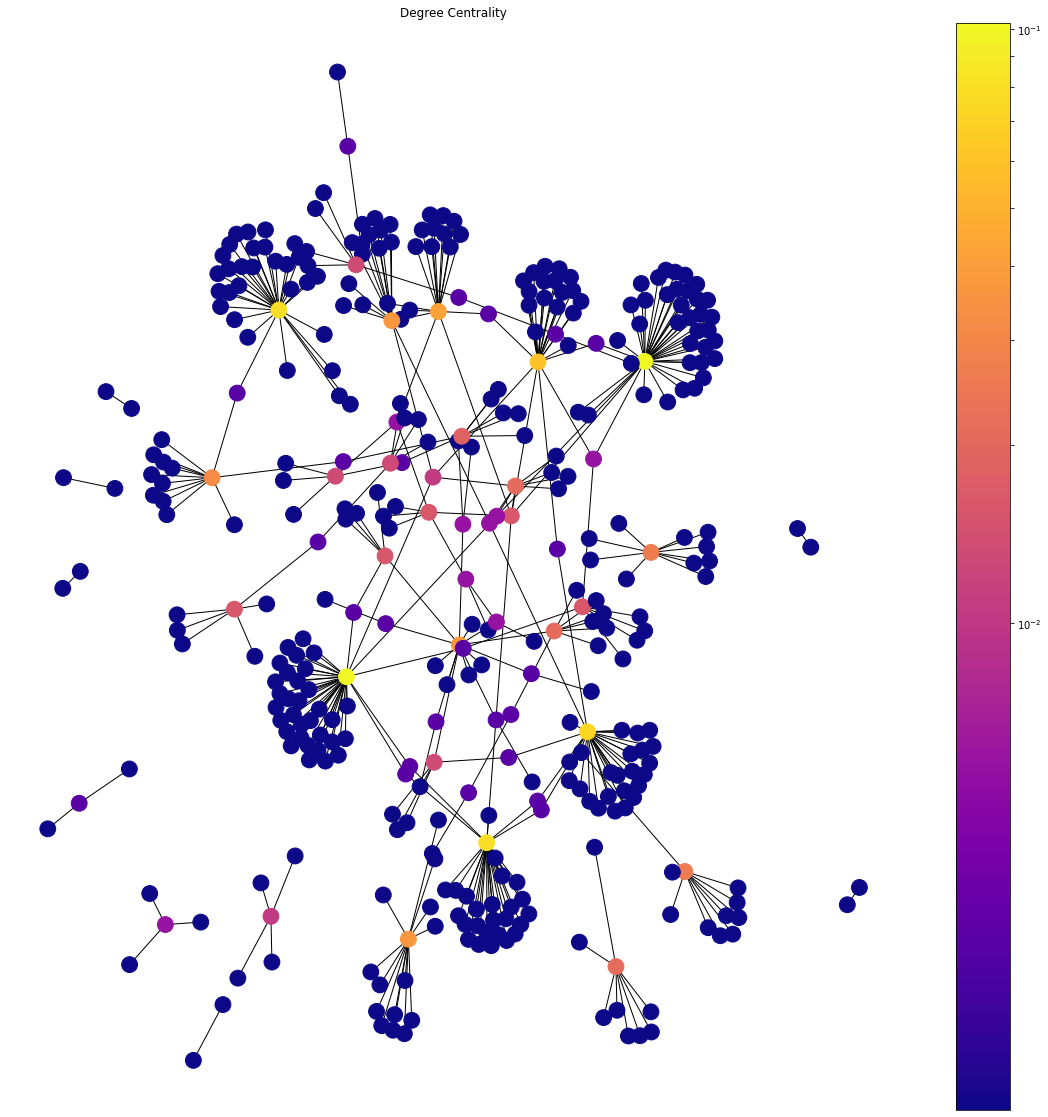

In [55]:
draw(G, nx.spring_layout(G, k=0.05, iterations=20), nx.degree_centrality(G), 'Degree Centrality')

In [56]:
H = nx.Graph()
for i,row in twt_df.iterrows():
    for like in row['list_likes']:
        H.add_edge(row['tweet'], like)

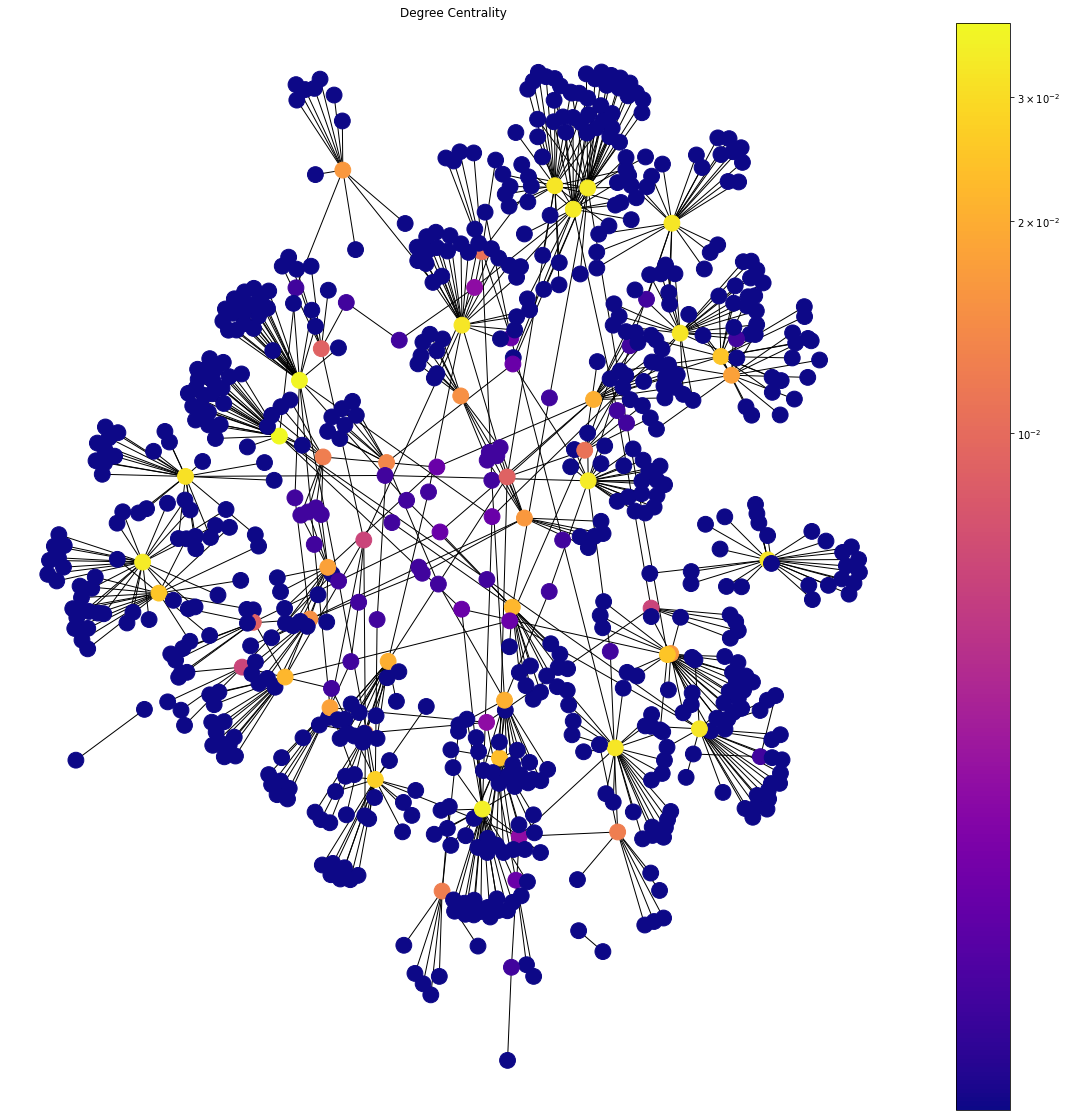

In [57]:
draw(H, nx.spring_layout(H, k=0.05, iterations=20), nx.degree_centrality(H), 'Degree Centrality')

In [59]:
K = nx.Graph()
for i,row in twt_df.iterrows():
    for rt in row['list_retweets']:
        K.add_edge(row['tweet'], rt)

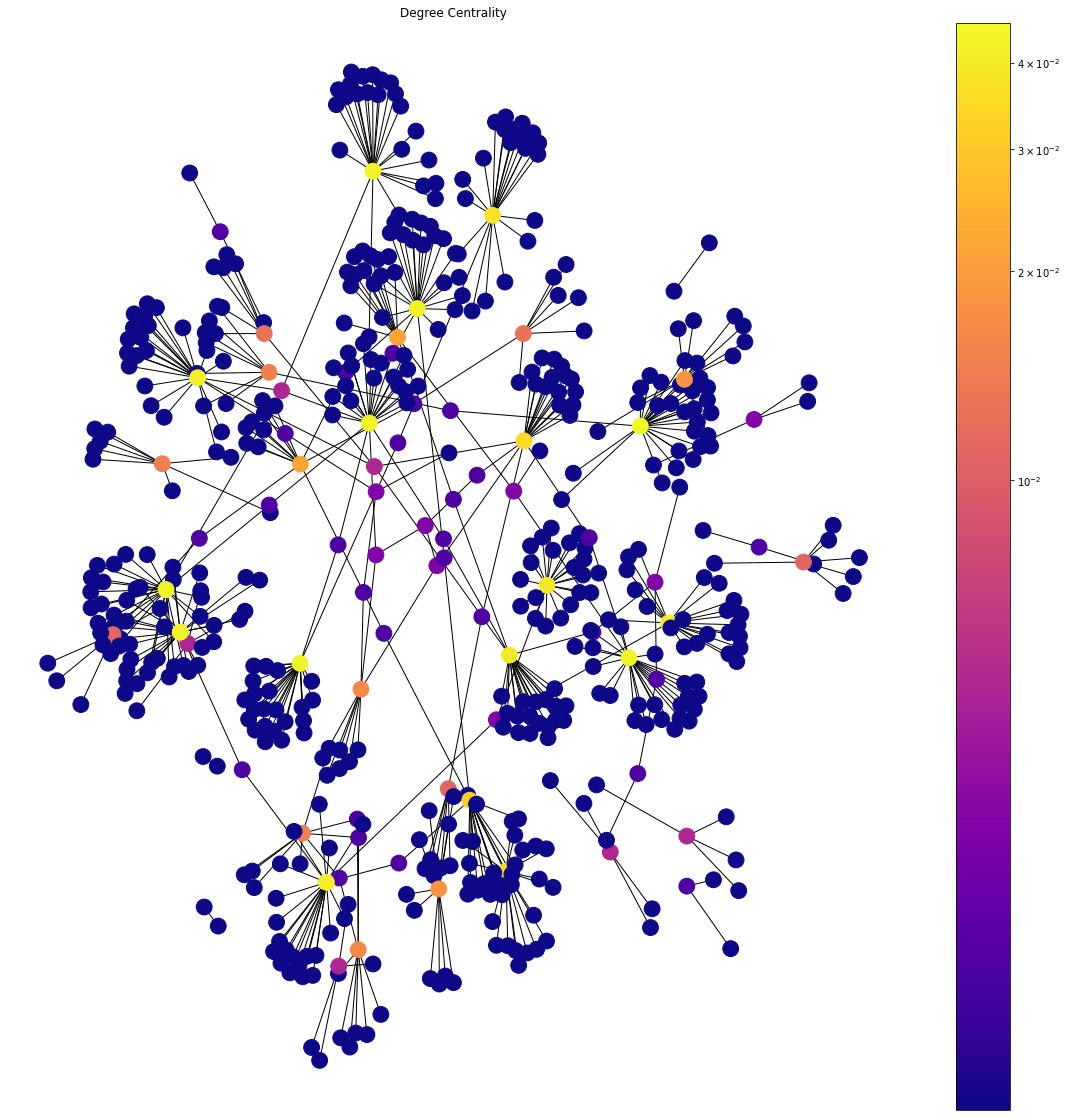

In [60]:
draw(K, nx.spring_layout(K, k=0.05, iterations=20), nx.degree_centrality(K), 'Degree Centrality')